In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

# Convert Month to datetime
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

data.head()




,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


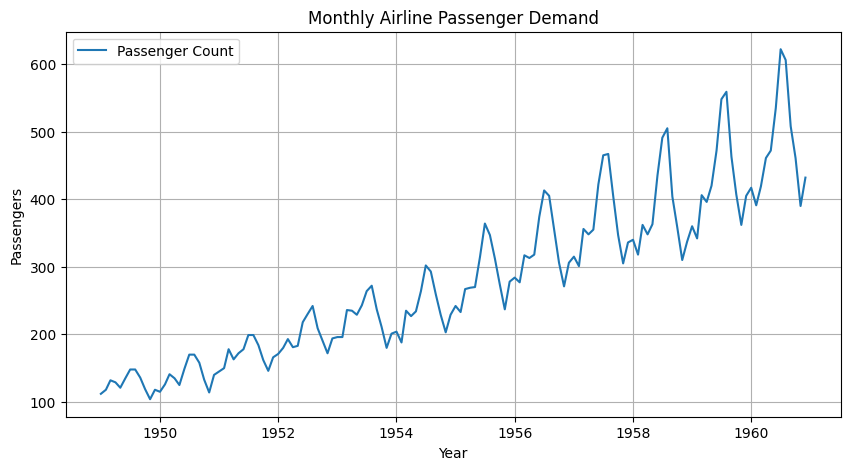

In [6]:
plt.figure(figsize=(10,5))
plt.plot(data, label='Passenger Count')
plt.title("Monthly Airline Passenger Demand")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()


In [7]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

    if result[1] <= 0.05:
        print("Series is Stationary")
    else:
        print("Series is Non-Stationary")

adf_test(data['Passengers'])


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Series is Non-Stationary


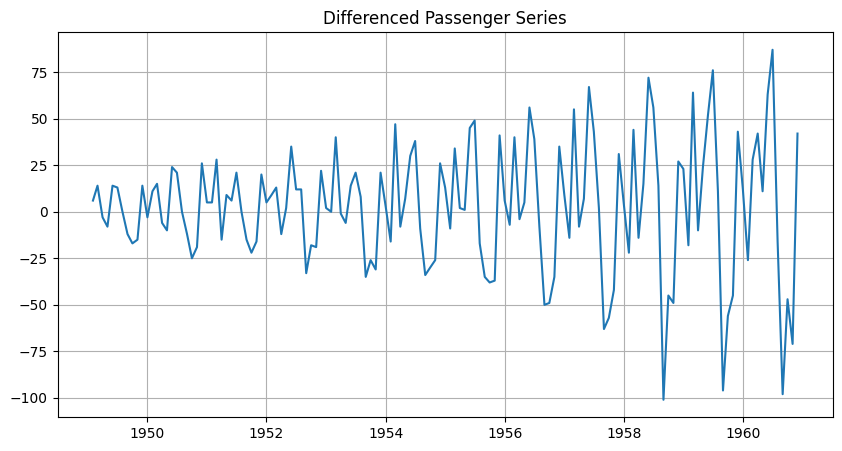

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Series is Non-Stationary


In [8]:
data_diff = data['Passengers'].diff().dropna()

plt.figure(figsize=(10,5))
plt.plot(data_diff)
plt.title("Differenced Passenger Series")
plt.grid()
plt.show()

adf_test(data_diff)


<Figure size 1200x500 with 0 Axes>

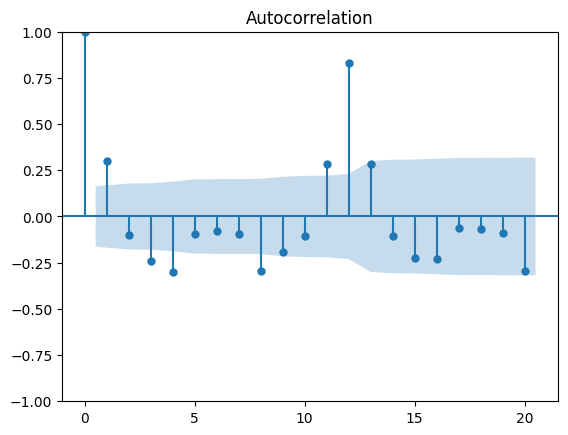

<Figure size 1200x500 with 0 Axes>

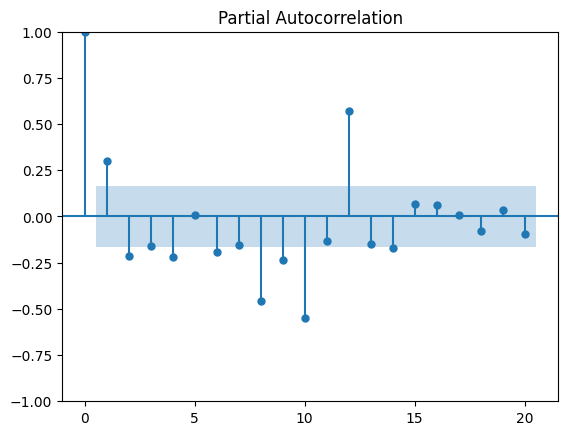

In [9]:
plt.figure(figsize=(12,5))
plot_acf(data_diff, lags=20)
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(data_diff, lags=20)
plt.show()


In [10]:
train = data.iloc[:-12]
test = data.iloc[-12:]

print("Training Size:", len(train))
print("Testing Size:", len(test))


Training Size: 132
Testing Size: 12


In [11]:
model = ARIMA(train['Passengers'], order=(2,1,2))
model_fit = model.fit()

print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -607.782
Date:                Mon, 09 Feb 2026   AIC                           1225.563
Time:                        04:32:24   BIC                           1239.939
Sample:                    01-01-1949   HQIC                          1231.405
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6660      0.024     68.561      0.000       1.618       1.714
ar.L2         -0.9294      0.022    -41.536      0.000      -0.973      -0.886
ma.L1         -1.8324      0.032    -56.857      0.0

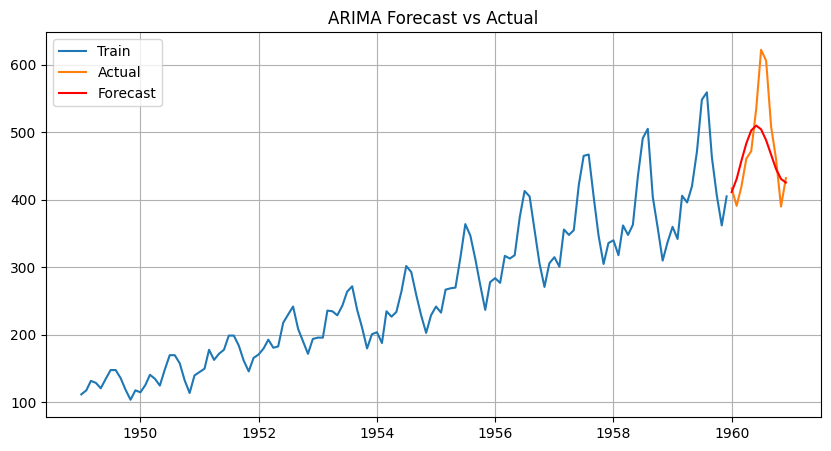

In [12]:
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(10,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.grid()
plt.show()


In [13]:
mae = mean_absolute_error(test['Passengers'], forecast)
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 41.83479799137674
Root Mean Squared Error (RMSE): 55.2228387419131


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


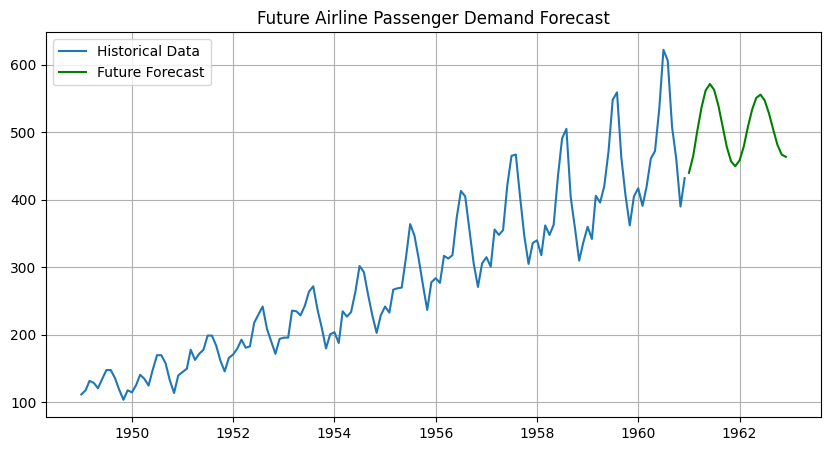

In [14]:
final_model = ARIMA(data['Passengers'], order=(2,1,2))
final_model_fit = final_model.fit()

future_forecast = final_model_fit.forecast(steps=24)

plt.figure(figsize=(10,5))
plt.plot(data['Passengers'], label='Historical Data')
plt.plot(future_forecast, label='Future Forecast', color='green')
plt.title("Future Airline Passenger Demand Forecast")
plt.legend()
plt.grid()
plt.show()
